In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.linear_model import LinearRegression
import datawig
import seaborn as sns
import matplotlib
from sklearn.impute import SimpleImputer

In [2]:
pd.set_option('display.max_rows', 90)

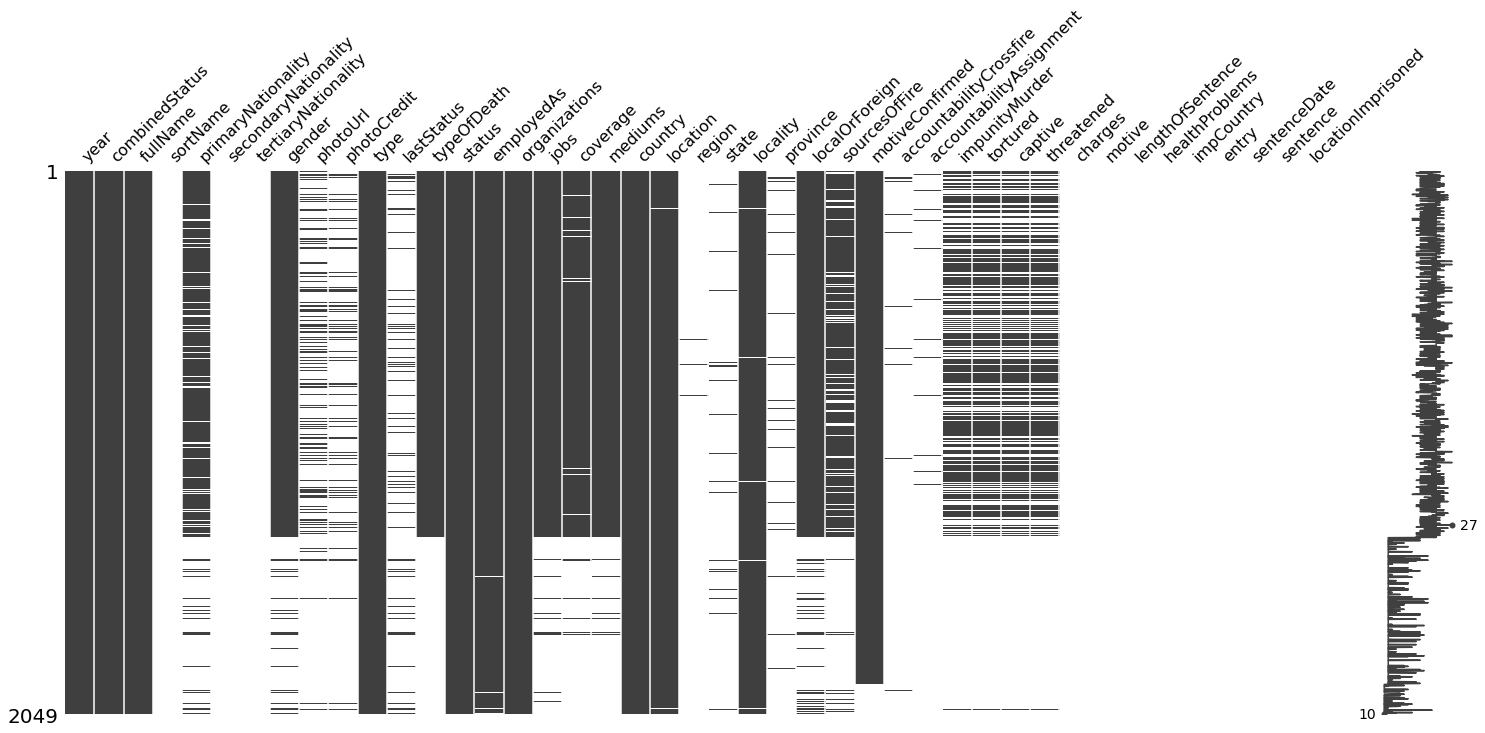

In [3]:
data = pd.read_csv("Journalists  Media Workers Killed between 1992 and 2020.csv")
msno.matrix(data)
data_copy = data

In [49]:
data.head(55)

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,Confirmed,Abay Hailu,NaN,Ethiopia,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,Confirmed,Abd al-Karim al-Ezzo,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,Confirmed,Abdallah Bouhachek,NaN,Algeria,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Confirmed,Abdel Aziz Mahmoud Hasoun,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,Confirmed,Abdel Karim al-Oqda,NaN,Syria,NaN,NaN,Male,https://cpj-photos.s3-us-west-2.amazonaws.com/...,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,Confirmed,Abdel Karim al-Rubai,NaN,Iraq,NaN,NaN,Male,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013,Confirmed,Abdel Karim Nazir Ismail,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2004,Confirmed,Abdel Sattar Abdel Karim,NaN,Iraq,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993,Confirmed,Abdelhamid Benmeni,NaN,Algeria,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

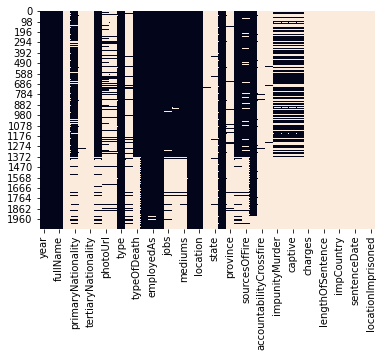

In [38]:
sns.heatmap(data.isnull(), cbar=False)

<AxesSubplot:>

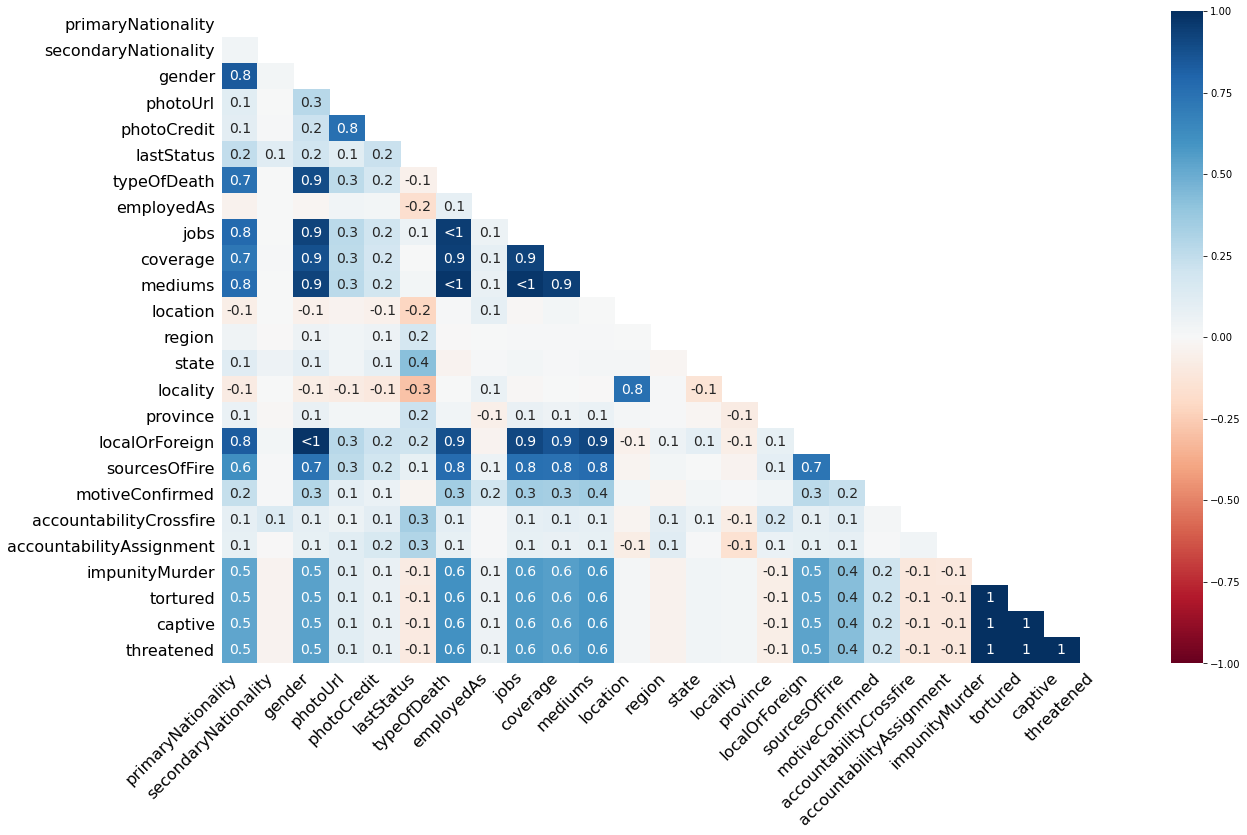

In [39]:
msno.heatmap(data)

<AxesSubplot:>

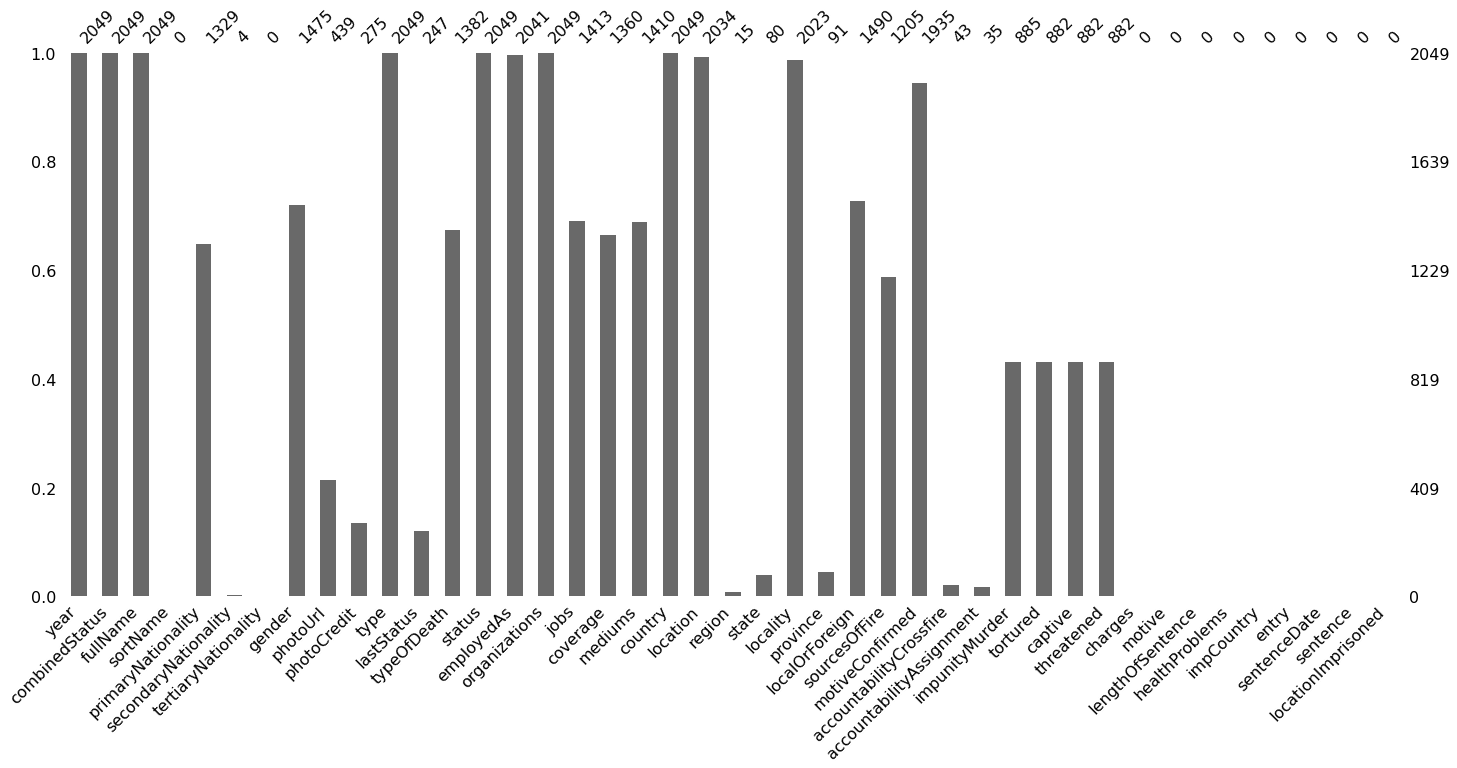

In [40]:
msno.bar(data)

In [43]:
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head(15)

,year,combinedStatus,fullName,type,status,organizations,country
0,2018,Confirmed,Abadullah Hananzai,Journalist,Killed,"Radio Azadi,Radio Free Europe/Radio Liberty",Afghanistan
1,1998,Confirmed,Abay Hailu,Journalist,Killed,Agiere,Ethiopia
2,2012,Confirmed,Abd al-Karim al-Ezzo,Journalist,Killed,Freelance,Syria
3,1996,Confirmed,Abdallah Bouhachek,Journalist,Killed,Révolution et Travail,Algeria
4,2013,Confirmed,Abdel Aziz Mahmoud Hasoun,Journalist,Killed,Masar Press,Syria
5,2012,Confirmed,Abdel Karim al-Oqda,Journalist,Killed,Shaam News Network,Syria
6,2006,Confirmed,Abdel Karim al-Rubai,Journalist,Killed,Al-Sabah,Iraq
7,2013,Confirmed,Abdel Karim Nazir Ismail,Journalist,Killed,Freelance,Syria
8,2004,Confirmed,Abdel Sattar Abdel Karim,Journalist,Killed,Al Ta'akhy,Iraq
9,1993,Confirmed,Abdelhamid Benmeni,Journalist,Killed,Algérie-Actualité,Algeria


In [44]:
print("Columns in original dataset: %d \n" % data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 7


In [4]:
data["gender"] = [1 if x=="Male" else 0 for x in data["gender"]]
data["gender"][::20]

0       1
20      1
40      1
60      1
80      1
       ..
1960    1
1980    0
2000    0
2020    0
2040    0
Name: gender, Length: 103, dtype: int64

In [5]:
data["gender"][::55]

0       1
55      1
110     1
165     1
220     1
275     1
330     0
385     1
440     0
495     1
550     1
605     1
660     1
715     1
770     0
825     0
880     1
935     1
990     1
1045    1
1100    1
1155    1
1210    1
1265    1
1320    1
1375    1
1430    0
1485    0
1540    0
1595    0
1650    0
1705    0
1760    0
1815    0
1870    1
1925    1
1980    0
2035    0
Name: gender, dtype: int64

In [10]:
data_copy["gender"] = [1 if x=="Male" else 0 for x in data_copy["gender"]]
data_copy["gender"][::55]

0       0
55      0
110     0
165     0
220     0
275     0
330     0
385     0
440     0
495     0
550     0
605     0
660     0
715     0
770     0
825     0
880     0
935     0
990     0
1045    0
1100    0
1155    0
1210    0
1265    0
1320    0
1375    0
1430    0
1485    0
1540    0
1595    0
1650    0
1705    0
1760    0
1815    0
1870    0
1925    0
1980    0
2035    0
Name: gender, dtype: int64

In [5]:
data_copy.tail(35)

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
2014,2010,Confirmed,Mohammad Sarwar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,2006,Confirmed,Mohammad Siddik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,2013,Confirmed,Mohammed Abdul-Hameed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,2017,Confirmed,Mohammed Amir Shinwari,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,2017,Confirmed,Mohammed Nazir,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,2014,Confirmed,Mohammed Nour al-Din al-Deiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,2014,Killed,Molou Chérif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,2015,Confirmed,Monir Aklan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,2006,Confirmed,Muazaz Ahmed Barood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,2004,Confirmed,Muhammad Ahmad Sarham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data['gender'] = data["gender"].fillna('U')
data.isnull().sum()


year                           0
combinedStatus                 0
fullName                       0
sortName                    2049
primaryNationality           720
secondaryNationality        2045
tertiaryNationality         2049
gender                         0
photoUrl                    1610
photoCredit                 1774
type                           0
lastStatus                  1802
typeOfDeath                  667
status                         0
employedAs                     8
organizations                  0
jobs                         636
coverage                     689
mediums                      639
country                        0
location                      15
region                      2034
state                       1969
locality                      26
province                    1958
localOrForeign               559
sourcesOfFire                844
motiveConfirmed              114
accountabilityCrossfire     2006
accountabilityAssignment    2014
impunityMu

In [ ]:
# 1. strategy one drop columns with nan row drop not an option
# 2. change some Nan columns value on something
# 3. make custom solution for each column.... like use names female/male dictionaries to find out gender
# 4. drop columns with no data